<a href="https://colab.research.google.com/github/youngmook/JavaLearner/blob/master/dnn/4_ImageNet_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.applications import VGG19
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG19(weights="imagenet")

574726144/574710816 [==============================] - 3s 0us/step


In [13]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(549, 976, 3)


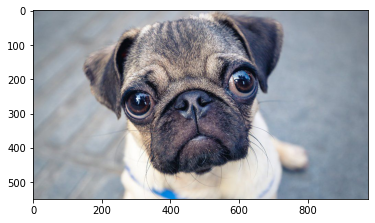

In [15]:
show_image('pug.jpg')

In [17]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg19 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [18]:
processed_image = load_and_process_image("pug.jpg")

Original image shape:  (549, 976, 3)
Processed image shape:  (1, 224, 224, 3)


In [20]:
from tensorflow.keras.applications.vgg19 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(549, 976, 3)
Original image shape:  (549, 976, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02108089', 'boxer', 0.69783777), ('n02108422', 'bull_mastiff', 0.1660448), ('n02110958', 'pug', 0.08530666)]]


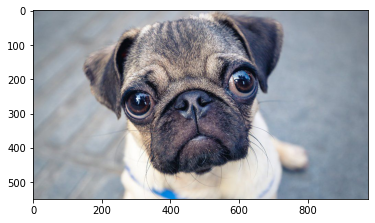

In [21]:
readable_prediction("pug.jpg")

(236, 177, 4)
Original image shape:  (236, 177, 4)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n04350905', 'suit', 0.74362713), ('n04591157', 'Windsor_tie', 0.17389372), ('n10148035', 'groom', 0.07681596)]]


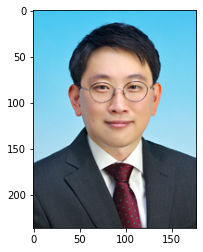

In [22]:
readable_prediction("image01.png")